In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN
import sklearn.utils

In [2]:
cust = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
cust.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [3]:
# checking for null
cust.isnull().nunique()

CustomerID                1
Gender                    1
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    1
dtype: int64

In [4]:
# checking value type of columns
cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# it seems we have only one categorial input data
s = (cust.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
cust[object_cols] = ordinal_encoder.fit_transform(cust[object_cols])
cust.dtypes

CustomerID                  int64
Gender                    float64
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
dtype: object

In [6]:
features = cust.drop('CustomerID', axis=1)
x = features.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

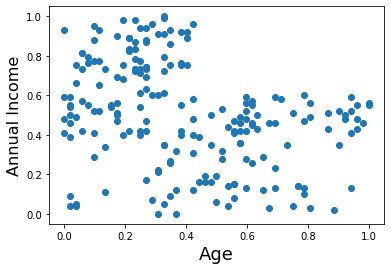

In [7]:
plt.scatter(feature_mtx[:, 1], feature_mtx[:, 3])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income', fontsize=16)

plt.show()

In [8]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(feature_mtx)
labels_km = k_means.labels_
cust["customer seg by kmean"] = labels_km
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer seg by kmean
0,1,1.0,19,15,39,0
1,2,1.0,21,15,81,0
2,3,0.0,20,16,6,1
3,4,0.0,23,16,77,1
4,5,0.0,31,17,40,1


In [9]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx)
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(dist_matrix)
labels_hia = agglom.labels_
cust["customer seg by hia"] = labels_hia
cust.head()

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer seg by kmean,customer seg by hia
0,1,1.0,19,15,39,0,1
1,2,1.0,21,15,81,0,1
2,3,0.0,20,16,6,1,0
3,4,0.0,23,16,77,1,0
4,5,0.0,31,17,40,1,0


In [10]:
db = DBSCAN(eps=0.4, min_samples=12)
db.fit(feature_mtx)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_db = db.labels_
cust["customer seg by db"]=labels_db
realClusterNum=len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(realClusterNum)

cust.head()

2


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer seg by kmean,customer seg by hia,customer seg by db
0,1,1.0,19,15,39,0,1,0
1,2,1.0,21,15,81,0,1,0
2,3,0.0,20,16,6,1,0,1
3,4,0.0,23,16,77,1,0,1
4,5,0.0,31,17,40,1,0,1
